In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties


pd.set_option('display.max_columns', None)

Upload dos dados

In [3]:
dados = pd.read_csv('dados_desafio/student-mat.csv',low_memory=False)
dados.shape

(395, 33)

Análise geral dos dados

In [29]:
dados.head(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0     0.0  0.0   18      1.0      0.0      0.0     4     4   0.0   4.0   
1     0.0  0.0   17      1.0      0.0      1.0     1     1   0.0   2.0   
2     0.0  0.0   15      1.0      1.0      1.0     1     1   0.0   2.0   
3     0.0  0.0   15      1.0      0.0      1.0     4     2   1.0   3.0   
4     0.0  0.0   16      1.0      0.0      1.0     3     3   2.0   2.0   

   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0     0.0       1.0           2          2         0        1.0     0.0   0.0   
1     0.0       0.0           1          2         0        0.0     1.0   0.0   
2     2.0       1.0           1          2         3        1.0     0.0   1.0   
3     1.0       1.0           1          3         0        0.0     1.0   1.0   
4     1.0       0.0           1          2         0        0.0     1.0   1.0   

   activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
0         0.0      1.0     1.0       0.0       0.0       4         3      4   
1         0.0      0.0     1.0       1.0       0.0       5         3      3   
2         0.0      1.0     1.0       1.0       0.0       4         3      2   
3         1.0      1.0     1.0       1.0       1.0       3         2      2   
4         0.0      1.0     1.0       0.0       0.0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10

In [30]:
dados.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob      reason    guardian  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     2.749367    2.521519    2.169620    2.281013    1.255696    0.853165   
std      1.094735    1.088201    1.227473    0.863542    1.208236    0.536684   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    2.000000    2.000000    0.000000    1.000000   
50%      3.000000    2.000000    2.000000    2.000000    1.000000    1.000000   
75%      4.000000    3.000000    3.000000    3.000000    3.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    2.000000   

       traveltime   studytime    failures   schoolsup      famsup        paid  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.448101    2.035443    0.334177    0.129114    0.612658    0.458228   
std      0.697505    0.839240    0.743651    0.335751    0.487761    0.498884   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    2.000000    0.000000    0.000000    1.000000    0.000000   
75%      2.000000    2.000000    0.000000    0.000000    1.000000    1.000000   
max      4.000000    4.000000    3.000000    1.000000    1.000000    1.000000   

       activities     nursery      higher    internet    romantic      famrel  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.508861    0.794937    0.949367    0.832911    0.334177    3.944304   
std      0.500555    0.404260    0.219525    0.373528    0.472300    0.896659   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      0.000000    1.000000    1.000000    1.000000    0.000000    4.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    4.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    5.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     1

Procurando valores faltantes

In [ ]:
#procurando valores faltantes

def missing_values_table(dados):
        mis_val = dados.isnull().sum() # conta a quantidade de missing
        mis_val_percent = 100 * dados.isnull().sum() / len(dados) # calcula a porcentagem
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # cria uma tabela
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores faltantes', 1 : '% do total'}) # renomeia as colunas
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% do total', ascending=False).round(1) # ordena os valores
        print ("Você selecionou um dataframe que tem " + str(dados.shape[1]) + " colunas.\n"      
            "E há " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores faltantes")
        return mis_val_table_ren_columns

In [ ]:
missing_dados = missing_values_table(dados)
missing_dados.tail()

Normalização dos dados

In [ ]:
#Categorizar dados que estavam em string
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]
categorical = dados[features]
enc.fit(categorical)
numerical = enc.transform(categorical)

for n, feat in enumerate(features):
    dados[feat] = numerical[:, n]

In [12]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [13]:
from sklearn.preprocessing import LabelEncoder

features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]

MultiColumnLabelEncoder(columns = features).fit_transform(dados)



school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   18        1        0        0     4     4     0     4   
1         0    0   17        1        0        1     1     1     0     2   
2         0    0   15        1        1        1     1     1     0     2   
3         0    0   15        1        0        1     4     2     1     3   
4         0    0   16        1        0        1     3     3     2     2   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...   
390       1    1   20        1        1        0     2     2     3     3   
391       1    1   17        1        1        1     3     1     3     3   
392       1    1   21        0        0        1     1     1     2     2   
393       1    1   18        0        1        1     3     2     3     2   
394       1    1   19        1        1        1     1     1     2     0   

     reason  guardian  traveltime  studytime  failures  schoolsup  famsup  \
0         0         1           2          2         0          1       0   
1         0         0           1          2         0          0       1   
2         2         1           1          2         3          1       0   
3         1         1           1          3         0          0       1   
4         1         0           1          2         0          0       1   
..      ...       ...         ...        ...       ...        ...     ...   
390       0         2           1          2         2          0       1   
391       0         1           2          1         0          0       0   
392       0         2           1          1         3          0       0   
393       0         1           3          1         0          0       0   
394       0         0           1          1         0          0       0   

     paid  activities  nursery  higher  internet  romantic  famrel  freetime  \
0       0           0        1       1         0         0       4         3   
1       0           0        0       1         1         0       5         3   
2       1           0        1       1         1         0       4         3   
3       1           1        1       1         1         1       3         2   
4       1           0        1       1         0         0       4         3   
..    ...         ...      ...     ...       ...       ...     ...       ...   
390     1           0        1       1         0         0       5         5   
391     0           0        0       1         1         0       2         4   
392     0           0        0       1         0         0       5         5   
393     0           0        0       1         1         0       4         4   
394     0           0        1       1         1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
0        4     1     1       3         6   5   6   6  
1        3     1     1       3         4   5   5   6  
2        2     2     3       3        10   7   8  10  
3        2     1     1       5         2  15  14  15  
4        2     1     2       5         4   6  10  10  
..     ...   ...   ...     ...       ...  ..  ..  ..  
390      4     4     5       4        11   9   9   9  
391      5     3     4       2         3  14  16  16  
392      3     3     3       3         3  10   8   7  
393      1     3     4       5         0  11  12  10  
394      3     3     3       5         5   8   9   9  

[395 rows x 33 columns]

In [14]:
# normalização dos dados //Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler().fit(dados)
dados2 = scaler.transform(dados)
new_dados = pd.DataFrame(StandardScaler().fit_transform(dados2), columns=dados.columns, index=dados.index)

Preparação dos dados

In [15]:
#preparação dos dados
X = new_dados.drop(['G3'], axis = 1)
y = new_dados['G3']

Seleção de Features

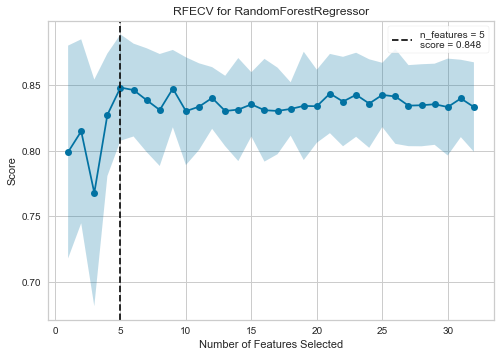

<AxesSubplot:title={'center':'RFECV for RandomForestRegressor'}, xlabel='Number of Features Selected', ylabel='Score'>

In [19]:
from yellowbrick.model_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor #essa linha eu adicionei pq tinha dado erro no visualizer

visualizer = RFECV(RandomForestRegressor(), cv=5, scoring='r2', n_jobs = -1, verbose = 1)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [60]:
feature_selection = X.loc[:, X.columns != 'false'].columns[visualizer.support_]

In [61]:
X1 = X[feature_selection]

PREDIÇÃO

In [1]:
X1

NameError: name 'X1' is not defined

In [63]:
#Importar a biblioteca
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

#Variável teste
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [64]:
# predicting a new value
y_pred = regressor.predict(X_test)

QUALIDADE DO MODELO

In [65]:
#QUALIDADE DO MODELO 
from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score = regressor.score(X_test, y_test)

In [66]:
score

0.8156441944437305

In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #Quanto mais próximo de 0, mais perfeita a predição do modelo é
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) #Obtém o valor quadrado (geralmente é maior que MAE); 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #medida de dispersão (as unidades combinam com as do output)

Mean Absolute Error: 0.24885164729043624
Mean Squared Error: 0.19356268917482589
Root Mean Squared Error: 0.4399575992920521


In [2]:
import dill
dill.load_session('desafiobackup.db')